In [2]:
import csv
import pandas as pd
import json
from functools import reduce
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from selenium import webdriver as webDriver
from bs4 import BeautifulSoup
from pprint import pprint
import re
import pandas as pd
import requests
from urllib import parse
import time
import json
from flask import jsonify
import csv
from urllib.request import urlopen

In [4]:
### 게임은 우선순위 순서로 입력
firstGame = '''PLAYERUNKNOWN'S BATTLEGROUNDS'''
secondGame = '''Grand Theft Auto V'''
thirdGame = '''Euro Truck Simulator 2'''

In [164]:
firefox_dir = r'C:\Users\ghc11\Desktop\geckodriver-v0.28.0-win64\geckodriver.exe'
driver = webDriver.Firefox(executable_path=firefox_dir)

In [5]:
### Steam의 전체 게임 목록이 저장되어있는 'result.csv' 참조
csvlist = pd.read_csv('result.csv', index_col=0)

url_list_raw = csvlist['Url']
gali = csvlist['Name']
count = 0
url_list = []

pattern = re.compile(r'^.*com/(.*/[0-9]*)/.*$')

for i in range(len(url_list_raw)):
    if pattern.match(url_list_raw[i]) != None:
        url_list.append(pattern.match(url_list_raw[i]).group(1))
        
for i in range(len(gali)):
    if gali[i] == "PLAYERUNKNOWN'S BATTLEGROUNDS":
        print(i)
        break

25004


In [166]:
### 가장 높은 우선순위의 게임을 구매한 사람들의 게임 구독 리스트 크롤링
TARGET = 25004
        
url = url_list[TARGET] # GTA V

href = "https://steamcommunity.com/" + url + "/reviews/?browsefilter=toprated&snr=1_5_100010_"
pprint(href)

SCROLL_PAUSE_TIME = 2
user_name = []
user_set = set()
rule = re.compile(r'.*com(.*)$')

driver.get(href)
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

if soup.find('div', 'adult_content_age_gate_buttons') is not None:
    driver.find_element_by_xpath('''//*[@id="age_gate_btn_continue"]/span''').click()
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')

#driver.page_source

last_height = driver.execute_script("return document.body.scrollHeight")
    
for i in range(70):
    # Scroll down to bottom                                                      
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    # Wait to load page
    time.sleep(SCROLL_PAUSE_TIME)                                                
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight-50);")  
    time.sleep(SCROLL_PAUSE_TIME)
    # Calculate new scroll height and compare with last scroll height            
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:                                                
        break
    last_height = new_height
    
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

user_list_raw = soup.find_all('div', 'apphub_friend_block_container')
for i in user_list_raw:
    user_link = i.find('a', href=True)['href']
    user_set.add(user_link)

user_list = list(user_set)
for i in range(len(user_list)):
    user_name.append(rule.match(user_list[i]).group(1))
    
print(len(user_name))
    
pattern = re.compile(r'var rgGames = (.*);')

GAME, USER, USER_GAME, TIME = [], [], [], []

for i in range(len(user_name)):
    href = 'https://steamcommunity.com' + user_name[i] + 'games/?tab=all'
    print(href)
    
    try:
        html = urlopen(href)
        bs = BeautifulSoup(html, 'html.parser')
    except Exception as e:
        print(e)
        continue

    
    try:
        result = pattern.search(str(bs)).group(1)
    except:
        continue
    #result = result.replace('\\', '')

    #print(result)
    
    json_data = json.dumps(json.loads(result.replace('\\\\"', '\\"')))
    data = json.loads(json_data)
    #print(data)
    
    for j in range(len(data)):
        GAME.append(gali[TARGET])
        USER.append(user_name[i])
        USER_GAME.append(data[j]["name"])
        try:
            TIME.append(data[j]["hours_forever"])
        except:
            TIME.append("")
        
     
    count += 1
    
    
print(count)
csvFile = open('user_list_' + gali[TARGET] + '3.csv', 'w+', newline='', encoding="utf-8-sig")
                
try:
    writer = csv.writer(csvFile)
    writer.writerow(('Game', 'User', 'User_Game', 'Running_time'))
    for Game, User, User_Game, Time in zip(GAME, USER, USER_GAME, TIME):
        writer.writerow((Game, User, User_Game, Time))
finally:
    csvFile.close()

'https://steamcommunity.com/app/578080/reviews/?browsefilter=toprated&snr=1_5_100010_'
240
https://steamcommunity.com/profiles/76561198202356063/games/?tab=all
https://steamcommunity.com/id/TristianX/games/?tab=all
https://steamcommunity.com/profiles/76561198003970656/games/?tab=all
https://steamcommunity.com/id/aps97/games/?tab=all
https://steamcommunity.com/id/youarenotaloneinyourhouse/games/?tab=all
https://steamcommunity.com/profiles/76561197988494930/games/?tab=all
https://steamcommunity.com/profiles/76561198093763795/games/?tab=all
https://steamcommunity.com/id/raisenko/games/?tab=all
https://steamcommunity.com/id/Salitz/games/?tab=all
https://steamcommunity.com/id/moohberry/games/?tab=all
https://steamcommunity.com/id/CharlieTime/games/?tab=all
https://steamcommunity.com/profiles/76561198083026914/games/?tab=all
HTTP Error 502: Bad Gateway
https://steamcommunity.com/id/pixelsrus/games/?tab=all
https://steamcommunity.com/id/BASEDLEGENDEWAN/games/?tab=all
https://steamcommunity.co

https://steamcommunity.com/id/oldmanlar/games/?tab=all
https://steamcommunity.com/id/pandapothead/games/?tab=all
https://steamcommunity.com/id/22wowie22/games/?tab=all
https://steamcommunity.com/profiles/76561198407831564/games/?tab=all
https://steamcommunity.com/id/1point8t/games/?tab=all
https://steamcommunity.com/id/Griffith-kun/games/?tab=all
https://steamcommunity.com/profiles/76561198015487375/games/?tab=all
https://steamcommunity.com/id/ni9w4ns/games/?tab=all
https://steamcommunity.com/id/actionj/games/?tab=all
https://steamcommunity.com/id/kryfixzzz/games/?tab=all
https://steamcommunity.com/profiles/76561197966482749/games/?tab=all
https://steamcommunity.com/id/buddhapest/games/?tab=all
https://steamcommunity.com/id/Raider217/games/?tab=all
https://steamcommunity.com/id/ImperiumSupremacy/games/?tab=all
https://steamcommunity.com/id/denoot/games/?tab=all
https://steamcommunity.com/id/IndomitableRage/games/?tab=all
https://steamcommunity.com/profiles/76561198311726661/games/?tab=

In [6]:
np.set_printoptions(linewidth=np.inf)

In [7]:
def GameScore(count, grade):
    score = (100 / count) * grade
    return score

In [8]:
userList, gameList, timeList, gameScore = [], [], [], []
totalCount = 0
userCount = {}
resultSet = {}

### 수집한 데이터를 여는 함수
def ViewGameList(fileName):
    #csvList = pd.read_csv('user_list_' + fileName + '.csv', index_col = False)
    csvList = open('user_list_' + fileName + '.csv', 'r', encoding='utf-8')
    csvList = csv.reader(csvList)
    for i in csvList:
        if i[1] == 'User':
            continue
            
        userList.append(i[1])
        gameList.append(i[2])
        timeList.append(i[3])
    
    totalCount = len(userList)
    
    for i in userList:
        try: userCount[i] += 1
        except: userCount[i] = 1
    
    userTemp = list(userCount.keys())
    
#     print(userCount)
#     print(len(userCount))
    
    ### 사람별 게임 구분. Dictionary 형식으로 저장, '아이디':'게임 목록'
    for i in range(len(userCount)):
        if i == 0:
            resultSet[userTemp[i]] = gameList[0:userCount[userTemp[i]] + 1]
            To = userCount[userTemp[i]] + 1
        else:
            From = To
            To = From + userCount[userTemp[i]]
            resultSet[userTemp[i]] = gameList[From:To]
            
    
    result_key = list(resultSet.keys())

    for i in range(len(result_key)):
        name = result_key[i]
        temp = resultSet[name]
        count = len(temp)
        index = 0

        for j in range(count):
            if temp[j] == firstGame:
                index = j
                break

        score = GameScore(count, index)
        
        if not (score <= 10):
            del resultSet[name]
        else:
            gameScore.append(score)
    
    #print(resultSet)
    
    return resultSet
    
result = ViewGameList(firstGame)

In [9]:
len(result) ### 81명의 Data

81

In [10]:
secondScoreT, thirdScoreT = [], []
secondScoreS = []

def Filter(result):
    Dual, Triple = {}, {}
    
    result_key = list(resultSet.keys())

    for i in range(len(result_key)):
        name = result_key[i]
        temp = resultSet[name]
        count = len(temp)
        index = 0

        ### 두 번째 우선순위의 게임도 하는 사람
        if secondGame in temp:
            Dual[name] = resultSet[name]
        
        ### 두 번째와 세 번째 우선순위의 게임 모두 다 하는 사람
        if secondGame in temp and thirdGame in temp:
            Triple[name] = resultSet[name]
        
    triple_key = list(Triple.keys())
    dual_key = list(Dual.keys())
    
    if len(Triple) > 0:
        for i in range(len(Triple)):
            name = triple_key[i]
            temp = Triple[name]
            count = len(temp)
            index_second = 0
            index_third = 0
            for j in range(count):
                if temp[j] == secondGame:
                    index_second = j
                    continue

                if temp[j] == thirdGame:
                    index_third = j

            #print(index_second, index_third)
                    
            score1 = GameScore(count, index_second)
            
            if not (score1 <= 10):
                del Triple[name]
                continue
            else:
                score2 = GameScore(count, index_third)
                if not (score2 <= 10):
                    #print(name)
                    del Triple[name]
                else:
                    secondScoreT.append(score1)
                    thirdScoreT.append(score2)
            
    if len(Dual) > 0:
        for i in range(len(Dual)):
            name = dual_key[i]
            temp = Dual[name]
            count = len(temp)
            index_second = 0
            for j in range(count):
                if temp[j] == secondGame:
                    index_second = j
                    break

            score = GameScore(count, index_second)

            if not (score <= 10):
                del Dual[name]
            else:
                secondScoreS.append(score)
            
    return Dual, Triple
    
Dual, Triple = Filter(result)

In [11]:
print(len(Dual))

39


In [12]:
print(len(Triple))

8


In [13]:
print(Triple)

{'/id/yssie/': ['Euro Truck Simulator 2', 'Microsoft Flight Simulator X: Steam Edition', 'Farming Simulator 19', 'Rocksmith® 2014 Edition - Remastered', 'American Truck Simulator', 'Microsoft Flight Simulator', 'Grand Theft Auto V', 'Elite Dangerous', 'Kerbal Space Program', '7 Days to Die', 'Factorio', "No Man's Sky", "PLAYERUNKNOWN'S BATTLEGROUNDS", 'Space Engineers', 'RimWorld', 'X-Plane 11', 'Stormworks: Build and Rescue', 'Fallout 4', 'Monster Hunter: World', 'Cities: Skylines', 'My Summer Car', 'theHunter: Call of the Wild™', 'Subnautica', 'Assetto Corsa', 'Farming Simulator 15', 'Satisfactory', 'The Witcher 3: Wild Hunt', 'Middle-earth™: Shadow of War™', 'PC Building Simulator', 'The Long Dark', 'Project Zomboid', 'Hunt: Showdown', 'Prison Architect', 'Derail Valley', 'Surviving Mars', 'Dying Light', 'PAYDAY 2', 'ARK: Survival Evolved', 'Stellaris', 'Mad Max', 'Sunless Sea', 'Left 4 Dead 2', 'Phasmophobia', 'Wallpaper Engine', 'Europa Universalis IV', 'Risk of Rain 2', 'MudRunne

In [14]:
scoreMat = {}

temp = list(Triple.keys())

target = Triple[temp[0]]

for i in range(len(target)):
    scoreMat[target[i]] = 100 - GameScore(len(target), i)
    
scoreMat

{'Euro Truck Simulator 2': 100.0,
 'Microsoft Flight Simulator X: Steam Edition': 99.85358711566617,
 'Farming Simulator 19': 99.70717423133236,
 'Rocksmith® 2014 Edition - Remastered': 99.56076134699853,
 'American Truck Simulator': 99.41434846266472,
 'Microsoft Flight Simulator': 99.26793557833089,
 'Grand Theft Auto V': 99.12152269399706,
 'Elite Dangerous': 98.97510980966325,
 'Kerbal Space Program': 98.82869692532942,
 '7 Days to Die': 98.68228404099561,
 'Factorio': 98.53587115666178,
 "No Man's Sky": 98.38945827232797,
 "PLAYERUNKNOWN'S BATTLEGROUNDS": 98.24304538799414,
 'Space Engineers': 98.09663250366032,
 'RimWorld': 97.9502196193265,
 'X-Plane 11': 97.80380673499268,
 'Stormworks: Build and Rescue': 97.65739385065886,
 'Fallout 4': 97.51098096632504,
 'Monster Hunter: World': 97.36456808199121,
 'Cities: Skylines': 97.2181551976574,
 'My Summer Car': 97.07174231332357,
 'theHunter: Call of the Wild™': 96.92532942898976,
 'Subnautica': 96.77891654465593,
 'Assetto Corsa': 

In [15]:
temp = list(Triple.keys())

inter = []

for i in range(len(temp)):
    inter.append(Triple[temp[i]])
    
inter

[['Euro Truck Simulator 2',
  'Microsoft Flight Simulator X: Steam Edition',
  'Farming Simulator 19',
  'Rocksmith® 2014 Edition - Remastered',
  'American Truck Simulator',
  'Microsoft Flight Simulator',
  'Grand Theft Auto V',
  'Elite Dangerous',
  'Kerbal Space Program',
  '7 Days to Die',
  'Factorio',
  "No Man's Sky",
  "PLAYERUNKNOWN'S BATTLEGROUNDS",
  'Space Engineers',
  'RimWorld',
  'X-Plane 11',
  'Stormworks: Build and Rescue',
  'Fallout 4',
  'Monster Hunter: World',
  'Cities: Skylines',
  'My Summer Car',
  'theHunter: Call of the Wild™',
  'Subnautica',
  'Assetto Corsa',
  'Farming Simulator 15',
  'Satisfactory',
  'The Witcher 3: Wild Hunt',
  'Middle-earth™: Shadow of War™',
  'PC Building Simulator',
  'The Long Dark',
  'Project Zomboid',
  'Hunt: Showdown',
  'Prison Architect',
  'Derail Valley',
  'Surviving Mars',
  'Dying Light',
  'PAYDAY 2',
  'ARK: Survival Evolved',
  'Stellaris',
  'Mad Max',
  'Sunless Sea',
  'Left 4 Dead 2',
  'Phasmophobia',
  

In [16]:
count = 0

for i in range(len(inter)):
    count += len(inter[i])

count

7681

In [17]:
tt=''
tata=[]
gt=[]

for i in range(len(inter)):
    for j in range(len(inter[i])):
        tt=tt+(inter[i][j])
        tt=tt+','
        
tata=tt.split(',')
my_set = set(tata)
tata = list(my_set)

all_game_list=[]
tg = pd.read_csv("result.csv")
for i in range(len(tg)):
    all_game_list.append(tg['Name'][i])
    
for i in range(0,len(tata)):
    if tata[i] == '':
        continue
    try:
        id=all_game_list.index(tata[i])
    except:
        continue
    tag_list=tg["User tag"][id]
    gt.append(tag_list)
    
llll=''
ll=[]

for i in range(len(gt)):
    try:
        llll= llll+ gt[i]
    except:
        continue
        
ll=llll.split(', ')
my_set = set(ll)
ll = list(my_set)

try:
    for i in range(len(gt[i])):   
        try:
            gt[i]=gt[i].split(', ')
        except:
            continue
except:
    print(1)
    
    
sc2=[]
for i in range(len(ll)):
    sc2.append(0)
    
for i in range(len(gt)):
    try:
        for j in range(len(gt[i])):
            if gt[i][j] in ll:
                sc2[ll.index(gt[i][j])]=sc2[ll.index(gt[i][j])]+1
    except:
        continue

a=[]
b=[]

for i in range(len(sc2)):
    if sc2[i] !=0 :
        a.append(ll[i])
        b.append(sc2[i])
        
result44={'tag':pd.Series(a),
            'count':pd.Series(b)
         }

df=pd.DataFrame(result44)
df.to_csv("user_tag_result.csv", encoding="utf-8-sig", mode='w', index=True)

In [18]:
tag_list = pd.read_csv('user_tag_result.csv', index_col=0)
tag_list = tag_list.sort_values(by='count', ascending=False)
tag_list

,tag,count
181,Indie,65
21,Singleplayer,51
76,Action,46
40,Adventure,38
216,Simulation,31
...,...,...
89,Epic,1
170,Tactical RPG,1
91,Hentai,1
95,Time Management,1


In [19]:
tag_count = tag_list['count']
tag_name = tag_list['tag']

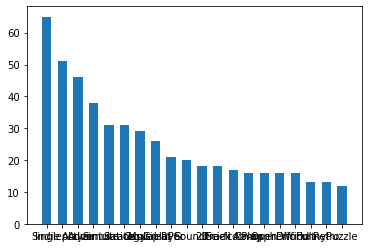

In [20]:
# plt.rcParams['figure.figsize'] = [20, 10]
x = np.arange(20)
plt.bar(x, tag_count[:20], width=0.6, tick_label=tag_name[:20])
plt.show()

In [21]:
RESULT = list(reduce(set.intersection, [set(inter_result) for inter_result in inter ]))

In [22]:
RESULT ### 세 가지 게임을 다 하는 사람들의 공통 게임 항목

["PLAYERUNKNOWN'S BATTLEGROUNDS",
 'Insurgency',
 'Grand Theft Auto V',
 'Euro Truck Simulator 2',
 'Terraria',
 'PAYDAY 2',
 'Left 4 Dead 2']

In [23]:
user_fav = []

for i in range(len(RESULT)):
    if RESULT[i] == firstGame:
        user_fav.append(100)
    elif RESULT[i] == secondGame:
        user_fav.append(95)
    elif RESULT[i] == thirdGame:
        user_fav.append(90)
    else:
        user_fav.append(0)
        
user_fav ### 우선순위별 점수 부여

[100, 0, 95, 90, 0, 0, 0]

In [24]:
scoreMat = {}

temp = list(Triple.keys())

arr = np.matrix([user_fav])

for i in range(len(temp)):
    target = Triple[temp[i]]

    for j in range(len(target)):
        scoreMat[target[j]] = 100 - GameScore(len(target), j)
    
    final_result = []
    for k in range(len(RESULT)):
        final_result.append(scoreMat[RESULT[k]])
    
    #print(final_result)
    arr = np.append(arr, np.array([final_result]), axis = 0)
            
print(arr)

[[100.           0.          95.          90.           0.           0.           0.        ]
 [ 98.24304539  64.86090776  99.12152269 100.          76.42752562  94.72913616  93.99707174]
 [ 94.51827243  95.84717608  99.16943522  90.3654485   81.06312292  88.53820598  96.67774086]
 [ 98.89400922  36.95852535  99.9078341   99.63133641  37.41935484  92.44239631  91.79723502]
 [ 99.86216402  88.904204    98.07029635  93.17711923  97.72570641  99.51757409  84.14886285]
 [ 98.87983707  97.55600815  99.69450102  96.23217923  96.94501018  99.59266802  97.25050916]
 [100.          43.40659341  99.81684982  93.04029304  12.45421245  87.91208791  98.35164835]
 [ 99.77477477  74.43693694  98.64864865  97.86036036  99.54954955  98.08558559  70.15765766]
 [ 99.93074792  50.55401662  99.58448753  92.31301939  63.78116343  99.72299169  96.95290859]]


In [25]:
df = pd.DataFrame(arr, columns=RESULT)
df

,PLAYERUNKNOWN'S BATTLEGROUNDS,Insurgency,Grand Theft Auto V,Euro Truck Simulator 2,Terraria,PAYDAY 2,Left 4 Dead 2
0,100.000000,0.000000,95.000000,90.000000,0.000000,0.000000,0.000000
1,98.243045,64.860908,99.121523,100.000000,76.427526,94.729136,93.997072
2,94.518272,95.847176,99.169435,90.365449,81.063123,88.538206,96.677741
3,98.894009,36.958525,99.907834,99.631336,37.419355,92.442396,91.797235
4,99.862164,88.904204,98.070296,93.177119,97.725706,99.517574,84.148863
5,98.879837,97.556008,99.694501,96.232179,96.945010,99.592668,97.250509
6,100.000000,43.406593,99.816850,93.040293,12.454212,87.912088,98.351648
7,99.774775,74.436937,98.648649,97.860360,99.549550,98.085586,70.157658
8,99.930748,50.554017,99.584488,92.313019,63.781163,99.722992,96.952909


In [26]:
from numpy import *

def pearsSim(inA,inB):
    if len(inA) < 3 : return 1.0
    return 0.5+0.5*corrcoef(inA, inB, rowvar = 0)[0][1]

def standEst(dataMat, user, simMeas, item):
    n = shape(dataMat)[1]
    simTotal = 0.0; ratSimTotal = 0.0
    for j in range(n):
        userRating = dataMat[user,j]
        if userRating == 0: continue
        # 두 사용자에 의해 점수가 매겨진 item 찾기, 0이 아닌 ([행], [열]) 배열
        overLap = nonzero(logical_and(dataMat[:,item].A>0, dataMat[:,j].A>0))[0]
        if len(overLap) == 0: similarity = 0
        else: similarity = simMeas(dataMat[overLap,item], dataMat[overLap,j])
        print('the %d and %d similarity is: %f' % (item, j, similarity))
        simTotal += similarity
        ratSimTotal += similarity * userRating
    if simTotal == 0: return 0
    else: return ratSimTotal/simTotal
    
def recommend(dataMat, user, N=3, simMeas=pearsSim, estMethod=standEst):
    # 1. 점수를 매기지 않은 item 찾기
    unratedItems = nonzero(dataMat[user:]==0.0)[1]
    if len(unratedItems) == 0.0: return 'you rated everything'
    itemScores = []
    
    # 2. 점수를 매기지 않은 item의 유사도
    for item in unratedItems:
        estimatedScore = estMethod(dataMat, user, simMeas, item)
        itemScores.append((item, estimatedScore))
    
    return sorted(itemScores, key=lambda jj: jj[1], reverse=True)[:N]

In [27]:
def_result = recommend(arr, 0) ### Pearson 상관계수

the 1 and 0 similarity is: 0.273911
the 1 and 2 similarity is: 0.230541
the 1 and 3 similarity is: 0.351374
the 4 and 0 similarity is: 0.413855
the 4 and 2 similarity is: 0.156800
the 4 and 3 similarity is: 0.515642
the 5 and 0 similarity is: 0.756808
the 5 and 2 similarity is: 0.302904
the 5 and 3 similarity is: 0.595946
the 6 and 0 similarity is: 0.348708
the 6 and 2 similarity is: 0.839799
the 6 and 3 similarity is: 0.340169


In [28]:
result_game = []

for i in range(len(def_result)):
    result_game.append(RESULT[def_result[i][0]])
    
result_game ### 추천 결과

['PAYDAY 2', 'Left 4 Dead 2', 'Insurgency']

In [29]:
result_index = []

for n in range(len(result_game)):
    for i in range(len(gali)):
        if gali[i] == result_game[n]:
            result_index.append(i)
            break
            
result_index

[25087, 25047, 27238]

In [30]:
FINAL = csvlist.loc[result_index] ### 최종 결과
FINAL

,Name,Genre,Developer,Publisher,Franchise,Release Date,User score,Meta score,User tag,Url
25087,PAYDAY 2,"Action, RPG",OVERKILL - a Starbreeze Studio.,Starbreeze Publishing AB,,"13 Aug, 2013",Very Positive,79,"Co-op, Action, FPS, Heist, Looter Shooter, Onl...",https://store.steampowered.com/app/218620/PAYD...
25047,Left 4 Dead 2,Action,Valve,Valve,,"16 Nov, 2009",Overwhelmingly Positive,89,"Zombies, Co-op, FPS, Multiplayer, Shooter, Act...",https://store.steampowered.com/app/550/Left_4_...
27238,Insurgency,"Action, Indie, Strategy",New World Interactive,New World Interactive,Insurgency,"22 Jan, 2014",Very Positive,74,"FPS, Realistic, Tactical, Multiplayer, Shooter...",https://store.steampowered.com/app/222880/Insu...


In [31]:
FINAL["User tag"]

25087    Co-op, Action, FPS, Heist, Looter Shooter, Onl...
25047    Zombies, Co-op, FPS, Multiplayer, Shooter, Act...
27238    FPS, Realistic, Tactical, Multiplayer, Shooter...
Name: User tag, dtype: object

In [273]:
tag_name[:20]

115               Indie
100        Singleplayer
45            Adventure
78               Action
22          Multiplayer
63          Atmospheric
23               Casual
38             Strategy
125          Simulation
70     Great Soundtrack
97             Survival
108             Shooter
113                  2D
99               Horror
129                 FPS
96         First-Person
109              Sci-fi
107        Free to Play
48         Early Access
29           Open World
Name: tag, dtype: object